<a href="https://colab.research.google.com/github/paaivarodrigo/Forest-Fires-in-Brazil/blob/main/Case_09_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Importing libraries

#Modeling and matrices
import pandas as pd
import numpy as np

#Graphical Analysis
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings

#Disable warnings
warnings.filterwarnings('ignore')

In [24]:
#Loading Data
df=pd.read_csv('/content/Dados_Incendio.csv', encoding='latin-1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [25]:
#Nulss
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [26]:
#Checking the dimension
df.shape

(6454, 5)

In [27]:
#Checking colummns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [28]:
#count the number of distinct elements on a specific axis
df.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [29]:
#Number of fires per year
Analise = df.groupby(by=['year']).sum().reset_index()
Analise

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


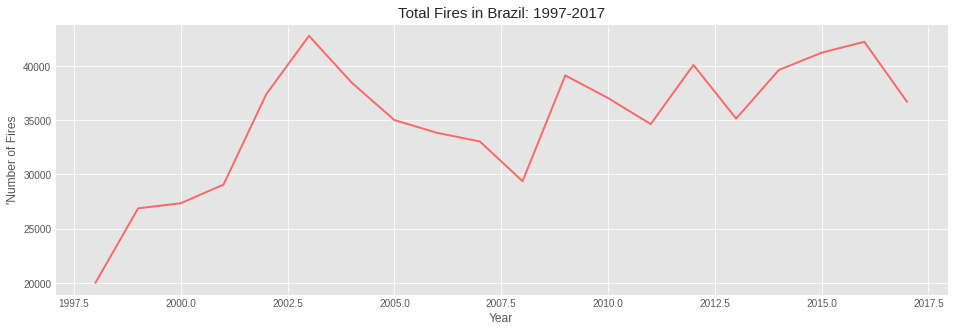

In [30]:
#Style
plt.style.use('ggplot')
#Chart
plt.figure(figsize=(16,5))
plt.title('Total Fires in Brazil: 1997-2017', loc='center', fontsize=15)
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=.85)
#Axes
plt.xlabel('Year')
plt.ylabel("'Number of Fires");

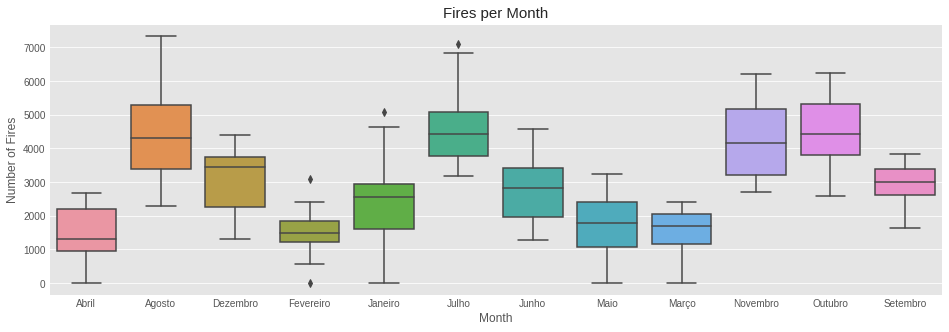

In [31]:
#Summing and grouping the data by month and year
Analise_02 = df.groupby(by=['year','month']).sum().reset_index()
#Chart
plt.figure(figsize=(16,5))
plt.title('Fires per Month', loc='center', fontsize=15)
sns.boxplot(data=Analise_02, x='month', y='number')
#Axes
plt.xlabel('Month')
plt.ylabel("Number of Fires");

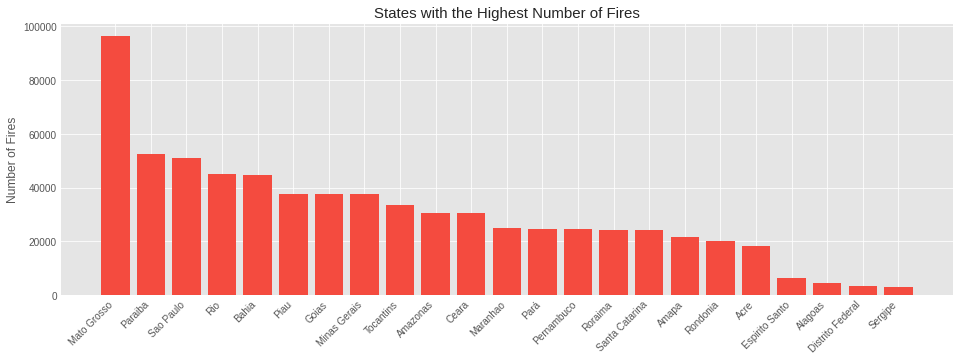

In [32]:
#Análise por ano do incêndio
Analise_03 = df.groupby(by=['state']).sum().reset_index()[['state','number']].sort_values('number', ascending=False)
Analise_03.head()
#Chart
plt.figure(figsize=(16,5))
plt.title('States with the Highest Number of Fires', loc='center', fontsize=15)
plt.bar(Analise_03.state,Analise_03['number'], color='#f44b3f')

#Labels
plt.ylabel('Number of Fires')
plt.xticks(rotation=45, ha='right');

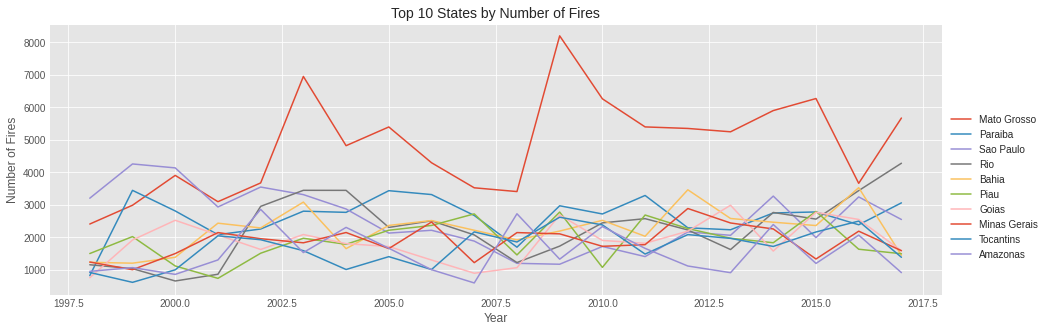

In [33]:
#Creating the list with the top 10 states in number of fires
Lista_Top10=Analise_03['state'][0:10].values
plt.figure(figsize=(16,5))
plt.title('Top 10 States by Number of Fires', loc='center', fontsize=14)
for Coluna in Lista_Top10:
  #Filtrar o Estado
  Filtro=df.loc[df['state']==Coluna]
  #Agrupar os Valores para sumarizar
  Analise_Local = Filtro.groupby(by=['year']).sum().reset_index()
  #Plot
  sns.lineplot(data=Analise_Local, x='year', y='number')

plt.xlabel('Year')
plt.ylabel('Number of Fires')

plt.legend(Lista_Top10, bbox_to_anchor=(1,.7));

In [34]:
# Plot GeoChart

# Generating the states
Estados = Analise_03.sort_values('state')['state'].values

# Generating the values
Valores = Analise_03.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizing the data
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Reading the dictionary
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [35]:
# Making the plot
import plotly.express as px

# Geographic Heat Map
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)

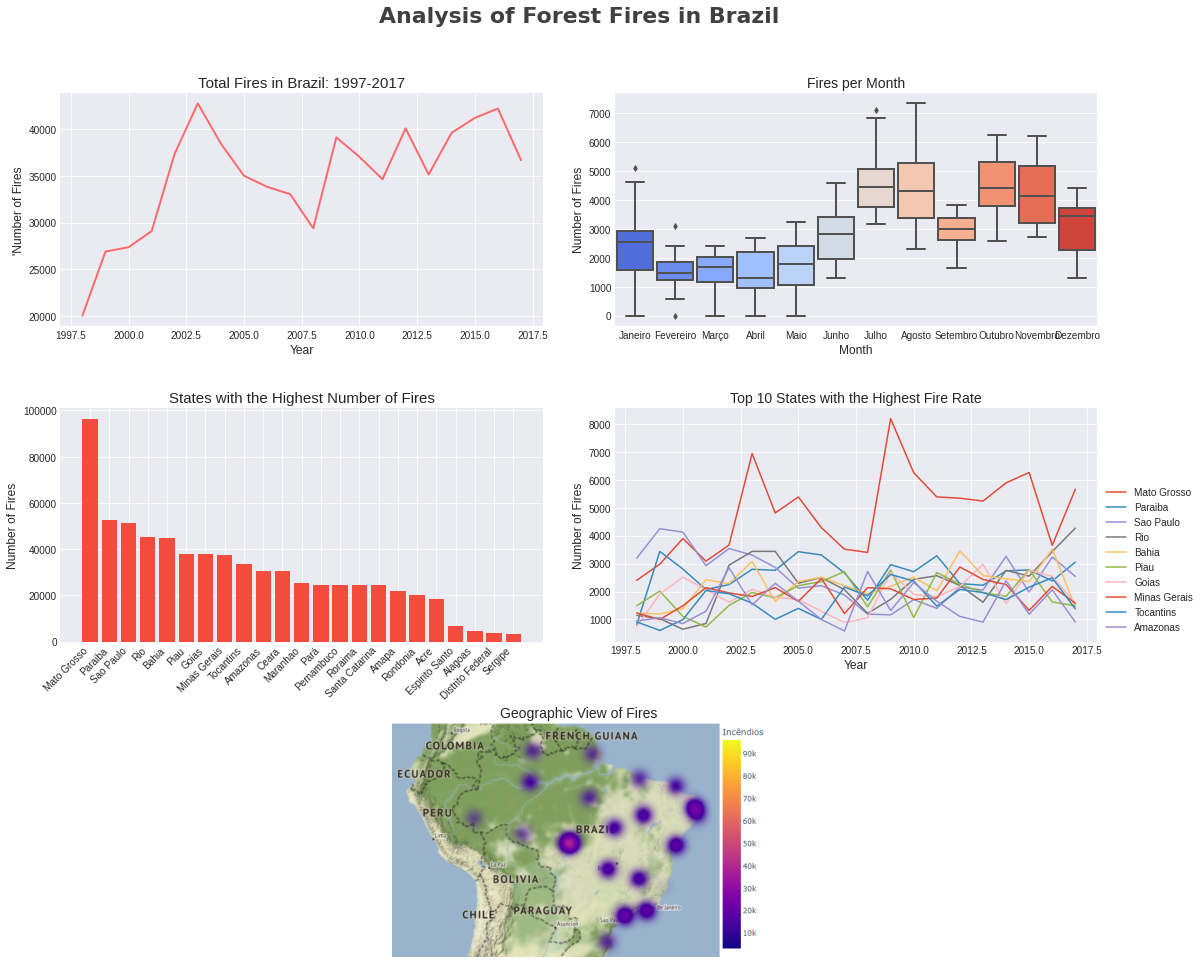

In [37]:
fig = plt.figure(figsize=(18, 15)) # initialize figure

ax = [ None for _ in range(6) ] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=2)
#Style
plt.style.use('seaborn-darkgrid')
# Title
plt.title('Total Fires in Brazil: 1997-2017', loc='center', fontsize=15)
#Chart
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=.85)
#Axes
plt.xlabel('Year')
plt.ylabel("'Number of Fires");


ax[1] = plt.subplot2grid((3,4), (0,2), colspan=2)
# Style
plt.style.use('seaborn-darkgrid')
# Titulo
plt.title('Fires per Month', loc='center', fontsize=14 )
# Grafico
sns.boxplot(x='month', y='number', data=Analise_02, palette="coolwarm", saturation=1, width=0.9, fliersize=4, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )
# Label
plt.xlabel('Month')
plt.ylabel('Number of Fires');


ax[2] = plt.subplot2grid((3,4), (1,0), colspan=2)
# Titulo
plt.title('States with the Highest Number of Fires', loc='center', fontsize=15)
#Chart
plt.bar(Analise_03.state,Analise_03['number'], color='#f44b3f')
#Labels
plt.ylabel('Number of Fires')
plt.xticks(rotation=45, ha='right');


ax[3] = plt.subplot2grid((3,4), (1,2), colspan=2)
# Style
plt.style.use('seaborn-darkgrid')
# Color palette
Paleta_Cores = sns.color_palette('inferno', 12)
# Title
plt.title('Top 10 States with the Highest Fire Rate', loc='center', fontsize=14, fontweight=0 )
# Plot of all columns
for Coluna in Lista_Top10:
  # Filter the state
  Filtro=df.loc[df['state']==Coluna]
  #Group the Values ​​to summarize
  Analise_Local = Filtro.groupby(by=['year']).sum().reset_index()
  #Plot
  sns.lineplot(data=Analise_Local, x='year', y='number')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(Lista_Top10, bbox_to_anchor=(1,.7));


ax[4] = plt.subplot2grid((3,4), (2,0), colspan=4)
import matplotlib.image as mpimg
Buraco_Negro = mpimg.imread('/content/5.png')
plt.imshow(Buraco_Negro)
plt.axis('off')
plt.title('Geographic View of Fires', loc='center', fontsize=14, fontweight=0 )

fig.tight_layout()

# Including the Title in the Figure
plt.suptitle(f'Analysis of Forest Fires in Brazil', fontsize=22, color='#404040', fontfamily='KyivType Sans', fontweight=600 )
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.35, hspace=0.35)

plt.show()